Bodasu karunanjali -INT2026-1462

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
#Load dataset
raw_df = pd.read_csv("Customer_Churn.csv")
df = raw_df.copy()

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,age,salary
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,56,69144
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,No,46,19025
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,32,94380
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,60,133910
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,25,111055


In [17]:
print("Dataset Shape:", df.shape)
df.info()
df.describe(include="all")
print("Missing values:\n", df.isnull().sum())
#Duplicate Check
print("Duplicate rows:", df.duplicated().sum())

Dataset Shape: (7043, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling

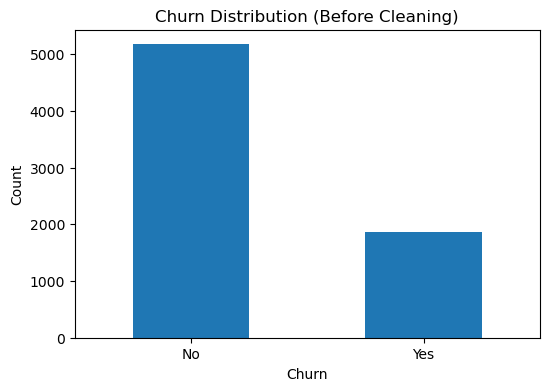

In [18]:

import matplotlib.pyplot as plt
import pandas as pd

# PLOTS BEFORE CLEANING

# 1) Churn Bar Chart
if "Churn" in df.columns:
    plt.figure(figsize=(6,4))
    df["Churn"].value_counts().plot(kind="bar")
    plt.title("Churn Distribution (Before Cleaning)")
    plt.xlabel("Churn")
    plt.ylabel("Count")
    plt.xticks(rotation=0)
    plt.show()

# 2) Gender Bar Chart
if "Gender" in df.columns:
    plt.figure(figsize=(6,4))
    df["Gender"].value_counts().plot(kind="bar")
    plt.title("Gender Distribution (Before Cleaning)")
    plt.xlabel("Gender")
    plt.ylabel("Count")
    plt.xticks(rotation=0)
    plt.show()

# 3) Age Histogram
if "Age" in df.columns:
    df["Age"] = pd.to_numeric(df["Age"], errors="coerce")  # convert to numeric
    plt.figure(figsize=(6,4))
    df["Age"].plot(kind="hist", bins=10)
    plt.title("Age Distribution (Before Cleaning)")
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    plt.show()

# 4) Salary Histogram + Boxplot
if "Salary" in df.columns:
    df["Salary"] = pd.to_numeric(df["Salary"], errors="coerce")  # convert to numeric

    plt.figure(figsize=(6,4))
    df["Salary"].plot(kind="hist", bins=10)
    plt.title("Salary Distribution (Before Cleaning)")
    plt.xlabel("Salary")
    plt.ylabel("Frequency")
    plt.show()

    plt.figure(figsize=(6,4))
    plt.boxplot(df["Salary"].dropna())
    plt.title("Salary Boxplot (Before Cleaning)")
    plt.ylabel("Salary")
    plt.show()


In [20]:
#DATA CLEANING
print("Shape before removing duplicates:", df.shape)
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)


#Fix Gender inconsistent formats
if "gender" in df.columns:
    df["gender"] = df["gender"].astype(str).str.strip().str.lower()

    df["gender"] = df["gender"].replace({
        "m": "male",
        "male": "male",
        "f": "female",
        "female": "female"
    })

    print("gender values after cleaning:\n", df["gender"].value_counts())
else:
    print("❌ gender column not found")

#Handle missing Age values
if "age" in df.columns:
    print("Missing age before:", df["age"].isnull().sum())
    df["age"] = df["age"].fillna(df["age"].median())
    print("Missing age after:", df["age"].isnull().sum())
else:
    print("❌ age column not found")



Shape before removing duplicates: (7043, 23)
Shape after removing duplicates: (7043, 23)
gender values after cleaning:
 gender
male      3555
female    3488
Name: count, dtype: int64
Missing age before: 0
Missing age after: 0


In [22]:
#Handle Salary outliers using IQR method
if "salary" in df.columns:
    Q1 = df["salary"].quantile(0.25)
    Q3 = df["salary"].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    print("salary lower bound:", lower)
    print("salary upper bound:", upper)

    before = df.shape[0]
    df = df[(df["salary"] >= lower) & (df["salary"] <= upper)]
    after = df.shape[0]

    print("Rows before outlier removal:", before)
    print("Rows after outlier removal:", after)
else:
    print("❌ salary column not found")


salary lower bound: -54389.0
salary upper bound: 218715.0
Rows before outlier removal: 7043
Rows after outlier removal: 7043


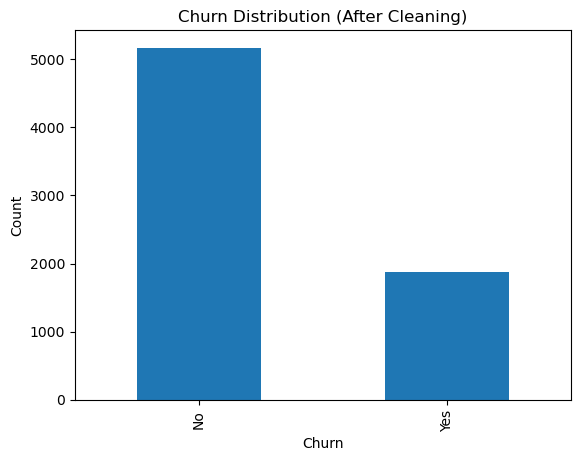

Final Shape: (7043, 23)
Final Missing Values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
age                 0
salary              0
dtype: int64


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,age,salary
0,7590-VHVEG,female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,56,69144
1,5575-GNVDE,male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,No,46,19025
2,3668-QPYBK,male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,32,94380
3,7795-CFOCW,male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,60,133910
4,9237-HQITU,female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,25,111055


In [24]:
#PLOTS AFTER CLEANING
#Churn Bar Chart
if "Churn" in df.columns:
    df["Churn"].value_counts().plot(kind="bar")
    plt.title("Churn Distribution (After Cleaning)")
    plt.xlabel("Churn")
    plt.ylabel("Count")
    plt.show()
#Gender Bar Chart    
if "Gender" in df.columns:
    df["Gender"].value_counts().plot(kind="bar")
    plt.title("Gender Distribution (After Cleaning)")
    plt.xlabel("Gender")
    plt.ylabel("Count")
    plt.show()
# Age Histogram
if "Age" in df.columns:
    df["Age"].plot(kind="hist", bins=10)
    plt.title("Age Distribution (After Cleaning)")
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    plt.show()
# Salary Histogram + Boxplot
if "Salary" in df.columns:
    df["Salary"].plot(kind="hist", bins=10)
    plt.title("Salary Distribution (After Cleaning)")
    plt.xlabel("Salary")
    plt.ylabel("Frequency")
    plt.show()

    plt.boxplot(df["Salary"].dropna())
    plt.title("Salary Boxplot (After Cleaning)")
    plt.ylabel("Salary")
    plt.show()
print("Final Shape:", df.shape)
print("Final Missing Values:\n", df.isnull().sum())
df.head()

In [26]:
df.to_csv("cleaned_customer_churn.csv", index=False)
print("✅ Cleaned dataset saved as cleaned_customer_churn.csv")

print("========== BEFORE CLEANING ==========")
print("Rows, Columns:", raw_df.shape)
print("Missing values:\n", raw_df.isnull().sum())

print("\n========== AFTER CLEANING ==========")
print("Rows, Columns:", df.shape)
print("Missing values:\n", df.isnull().sum())



✅ Cleaned dataset saved as cleaned_customer_churn.csv
========== BEFORE CLEANING ==========
Rows, Columns: (7043, 23)
Missing values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
age                 0
salary              0
dtype: int64

========== AFTER CLEANING ==========
Rows, Columns: (7043, 23)
Missing values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
T